### Multiclass classification

    Binary classification is is the classification of target y into 2 categories which are bianry i.e either 0 or 1
    
    Logistic Regression is used to deal the binary classification problems which uses sigmoidactivation(linearfunction)
                Linear function = z = w.x + b
                sigmoid = g(z) = 1 / (1 + e^-z)
                
                Logistic regression f(X) = g(w.x + b) =~ P(y=1 | X)   ----- (1)
            
            This is nothing but equal to P(y=1 | X) i.e probability of y equal to 1 given the input X
       
       We know that we use sigmoid Cuz sigmoid outputs 0 or 1 
       
     Multiclass classification is the type of classification where the target y can be any of that small discete number of categories( 1, 2,..,10) instead of just binary class(0 0r 1)
     
     For Multiclass classification, we will use generalized version of logistic regression(sigmoid) which is softmax regression inorder to expand it to more than 2 categories
     
     Logistic Regression used sigmoid function where as softmax regression uses softmax function. This softmax function is used in neural networks just like sigmoid function but for mutliclass classification problem instead of binary classification.
     
### Softmax Regression
        
        In both softmax regression and neural networks with Softmax outputs, N outputs are generated and one output is selected as the predicted category. In both cases a vector z is generated by a linear function which is applied to a softmax function. The softmax function converts z into a probability distribution(generates probabilities). After applying softmax, each output will be between 0 and 1(probabilities) and all the N outputs will add to 1, so that they can be interpreted as probabilities. The larger inputs will correspond to larger output probabilities. Each entry is the probability the input belongs to that category given the input X and parameters w and b.
        
       For eg, the softmax generates 10 outputs for 10 categories of y for given input x. Each output can be seen as
                    p(y=1 | X) = g(z1)
                    p(y=2 | X) = g(z2)
                    .
                    .
                    p(y=n | X) = g(z3)
                    
              where g is a softmax function
                        
               for category 1,       z1 = w.x + b 
                        
                    f(X) =   Softmax function g(z1) = e^z1 / Σk e^z where k tends from 0 to n labels
                                                    = e^z1 / (e^z1 + e^z2+ .... + e^z3 )
                                            
                                    Likewise g(z2) = e^z2 / (e^z1 + e^z2+ .... + e^z3 )
                                    .
                                    .
                                    .
                                         
              Sum of all the probabilties i.e all g(z's) = 1
              
          Note that g(z1) is not only a function of z1 but also the function all other z's unlike logistic regression where g(z) is just a function of z ( 1 / 1 + e^-z)
              
          When we have only the 2 labels, then the softmax regression is similar to logistic regression
              
        Loss function for softmax regression:(Categorical cross entropy)
        --------------------------------------
                    This is also basically derived from logistic loss / binary cross entropy loss
                    Logistic loss = -y log f(x) - ( 1-y) log (1-f(x)) -------(2)
                            where loss = - log f(X) when y = 1    ------ (3)
                                  loss = - log (1-f(X)) when y=0  -------(4)
                      we know f(X) = g(z) = sigmoid(z) 
                      
        Remember, this is also called activation function in neural network terminology. So, lets call f(x) as activation a1
                  => a1 = f(X) = g (w.x + b) = P(y=1 | X)  ----- (5)
                            
                 For binary classification, then what is P(y=0 | X) 
                 
                 it is just P(y=0 | X) = 1 - (P(y=1 | X) 
                                        = 1 - a1
                 
                 Lets call P(y=0 | X) as a2
                    => a2 = 1 - a1      ------- (6)
                    
                  From (5) and (6), we can rewrite loss 3 and 4 as
                  
                        Loss = -log a1 when y=1
                        Loss = -log a2 when y=0
                        
               Now we can generalize to softmax's loss function,
                       Loss = -log a1 when y=1
                              -log a2 when y=2
                              -log a3 when y=3
                              ..
                              -log an when y=n
               
               Here y is the true target, and a is the output of the softmax function
                              
           This is also called "categorical cross entropy loss"
           
           Loss will be less when the activation corresponds to the target is high other the cost will be high is the activation is less. activation corresponds to probability that the label y is the target label.
           
      Note that only the line(or activation) that corresponds to the target contributes to the loss, other lines are zero. This will be achieved with the indicator function.
                     
      To write the cost equation we need an 'indicator function' that will be 1 when the index matches the target and zero otherwise.
      
                   I(y==n) == {1 if y==n
                              { 0 otherwise
           
         Cost function = - 1 / m Σi=1tom Σj=1toN I(yi==j) log aj
              
                      =  - 1 / m Σi=1tom Σj=1toN I(yi==j) log (e^zj_i / Σk=1toN e^zi_k)
     
     where m is the number of examples, N is the number of outputs. Note k is from 1 to N to take all the e^z's of all the units in the denominator This is the average of all the losses.
     
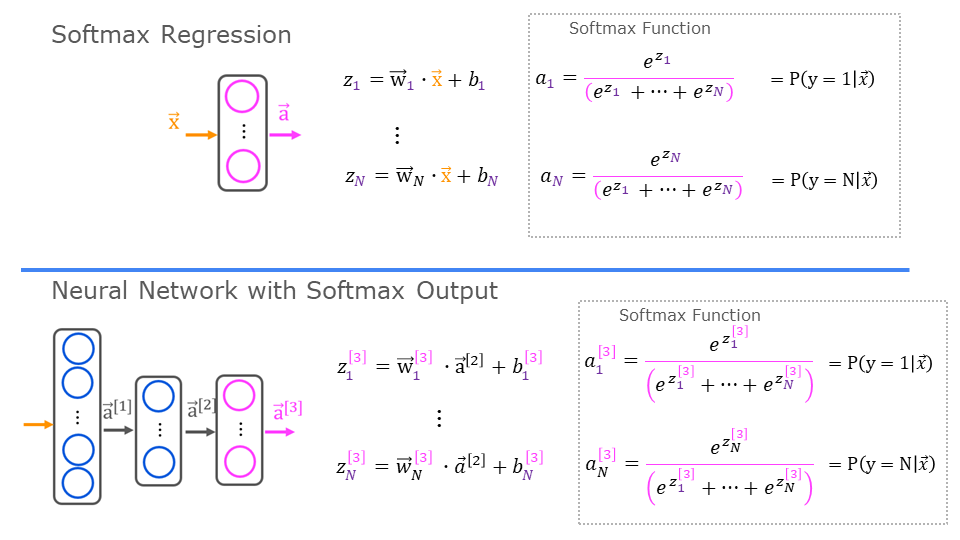

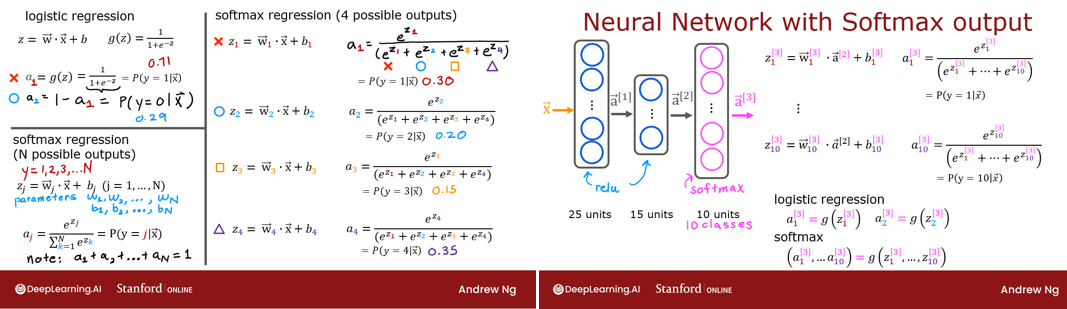 

In [18]:
from ipywidgets import Output
output = Output()
display(output)

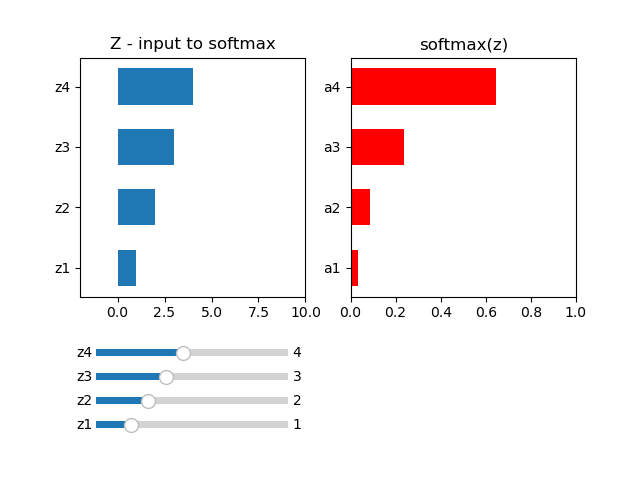

In [26]:
#plotting the softmax function vs its input z for 4 targets/outputs
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.widgets import Slider
import numpy as np
%matplotlib widget

def my_softmax(z_vec):
    exp_vec = np.exp(z_vec) #element wise exponentiation
    act_vec = exp_vec / np.sum(exp_vec) #element wise 
    return act_vec

def plot_softmax():
    fig = plt.figure()
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    gs = GridSpec(3, 2, figure=fig)
    ax0 = fig.add_subplot(gs[0:2, 0])
    ax1 = fig.add_subplot(gs[0:2, 1])
    ax0.set_xlim([-2, 10])
    ax0.set_title("Z - input to softmax")
    ax1.set_xlim([0, 1])
    ax1.set_title("softmax(z)")
    axes = [ax0, ax1]
    
    #plotting the base plot
    #set the labels for each z, actv of 4 outputs - z1, z2, z3, z4, a1, a2, a3, a4
    z_labels = np.array(["z1", "z2", "z3", "z4"])
    a_labels = np.array(["a1", "a2", "a3", "a4"])
    
    axs1 = fig.add_axes([0.15, 0.10, 0.30, 0.03])
    axs2 = fig.add_axes([0.15, 0.15, 0.30, 0.03])
    axs3 = fig.add_axes([0.15, 0.20, 0.30, 0.03])
    axs4 = fig.add_axes([0.15, 0.25, 0.30, 0.03])
    
    z1 = Slider(axs1, label="z1", valmin=-1.0, valmax=10.0, valinit=1.0, valstep=0.1)
    z2 = Slider(axs2, label="z2", valmin=-1.0, valmax=10.0, valinit=2.0, valstep=0.1)
    z3 = Slider(axs3, label="z3", valmin=-1.0, valmax=10.0, valinit=3.0, valstep=0.1)
    z4 = Slider(axs4, label="z4", valmin=-1.0, valmax=10.0, valinit=4.0, valstep=0.1)
    
    act_vec = my_softmax(np.array([z1.val, z2.val, z3.val, z4.val])) #returns 4 softmax activations for each z's
    z_bar = ax0.barh(y=z_labels, width=[z1.val, z2.val, z3.val, z4.val], height=0.6, left=None, align="center")
    s_bar = ax1.barh(y=a_labels, width=[*act_vec], height=0.6, left=None, align="center", color="red")
    z_bars = z_bar.get_children()
    s_bars = s_bar.get_children()
    
#     @output.capture()
    def update(val):
        z_bars[0].set_width(z1.val)
        z_bars[1].set_width(z2.val)
        z_bars[2].set_width(z3.val)
        z_bars[3].set_width(z4.val)
        act_vec = my_softmax(np.array([z1.val, z2.val, z3.val, z4.val])) #returns 4 softmax activations for each z's
        s_bars[0].set_width(act_vec[0])
        s_bars[1].set_width(act_vec[1])
        s_bars[2].set_width(act_vec[2])
        s_bars[3].set_width(act_vec[3])
        
        fig.canvas.draw_idle()
    
    z1.on_changed(update)
    z2.on_changed(update)
    z3.on_changed(update)
    z4.on_changed(update)
    
#     fig.tight_layout(pad=0.1)
    plt.show()
    
plot_softmax()

    As you are varying the values of the z's above, there are a few things to note:

        the exponential in the numerator of the softmax magnifies small differences in the values
        the output values sum to one
        the softmax spans all of the outputs. A change in z1 for example will change the values of a1-a4. Compare this to other activations such as ReLU or Sigmoid which have a single input and single output.

#### Softmax with tensorflow

In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.activations import softmax, linear, relu
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from sklearn.datasets import make_blobs

tf.autograph.set_verbosity(0)

#### Usual model with softmax layer and Sparsecategoricalcrossentropy
    The model below is implemented with the softmax as an activation in the final Dense layer. The loss function is separately specified in the compile directive.

    The loss function is SparseCategoricalCrossentropy which is described above. In this model, the softmax takes place in the last layer. The loss function takes in the softmax output which is a vector of probabilities.

In [6]:
#creating data

#Creating 2000 samples with four clusters, 
#each represented by a center point defined in the centers list
#The centers list contains four points, each representing the center of a cluster in a two-dimensional space.
#Each sublist represents the (x, y) coordinates of the center point.
#cluster_std: The standard deviation of the clusters. It determines how spread out the data points within each cluster will be. 
#Here, cluster_std=1.0 means that the data points within each cluster will have some random variation around their respective centers
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
X, y = make_blobs(n_samples=2000, centers=centers, cluster_std=1.0, random_state=30)
print(X.shape)
print(X[:5])
print(np.unique(y))

(2000, 2)
[[ 1.55508243  0.84801682]
 [-5.33749882  1.03397255]
 [-4.09353183  0.67843096]
 [-1.35928349 -1.49568732]
 [-0.67987836  3.15016353]]
[0 1 2 3]


In [15]:
#Neural network model architecture
model = Sequential([
    Dense(units=25, activation="relu"),
    Dense(units=15, activation="relu"),
    Dense(units=4, activation="softmax")
], name="mymodel")
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
model.fit(X, y, epochs=10)
model.summary()

Epoch 1/10
63/63 [==============================] - 1s 2ms/step - loss: 0.9253
Epoch 2/10
63/63 [==============================] - 0s 1ms/step - loss: 0.4105
Epoch 3/10
63/63 [==============================] - 0s 1ms/step - loss: 0.1753
Epoch 4/10
63/63 [==============================] - 0s 2ms/step - loss: 0.1033
Epoch 5/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0754
Epoch 6/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0621
Epoch 7/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0536
Epoch 8/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0479
Epoch 9/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0425
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0388
Model: "mymodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 25)                75   

In [17]:
#prediction to see the probabilities returned by the last softmax layer
y_preds = model.predict(X)
print(y_preds[:5]) #probabilities for all the class of each example


print("largest value", np.max(y_preds), "smallest value", np.min(y_preds))

#we can also get the target value from the index using np.argmax().see in the below example

63/63 [==============================] - 0s 1ms/step
[[1.7052485e-03 1.6538691e-03 9.7590852e-01 2.0732354e-02]
 [9.9416059e-01 5.6803031e-03 1.5455043e-04 4.5438715e-06]
 [9.6593159e-01 3.2597657e-02 1.3876099e-03 8.3134793e-05]
 [5.2250508e-04 9.9519402e-01 2.2264009e-03 2.0569917e-03]
 [3.0650303e-03 1.1852008e-03 9.9531978e-01 4.2996847e-04]]
largest value 0.9999999 smallest value 1.2644716e-10


#### Preferred way of using the activation function with_logits to avoid numerical round off errors (see the lecture c2 w2 ml specialization)

    Recall from lecture, more stable and accurate results can be obtained if the softmax and loss are combined during training. i.e calculating g(z) in the loss function itself instead of doing it as separate intermediate step. This is enabled by the 'preferred' organization shown here.
    
    In the preferred organization the final layer has a linear activation. For historical reasons, the outputs in this form are referred to as logits. The loss function has an additional argument: from_logits = True. This informs the loss function that the softmax operation should be included in the loss calculation. This allows for an optimized implementation.
    
    Output Handling
    ----------------
    Notice that in the preferred model, the outputs are not probabilities, but can range from large negative numbers to large positive numbers.  If the desired output are probabilities, the output should be be processed by a softmax i.e sent through a softmax when performing a prediction that expects a probability (which is a preferred model output)

In [20]:
model = Sequential([
    Dense(units=25, activation="relu"),
    Dense(units=15, activation="relu"),
    Dense(units=4, activation="linear") #this just gives z vector which is w.x + b which is what we call logits. Note z can be -ve or +ve
], name="mymodel")
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #notifying the compiler to calculate softmax from logits here and apply the loss function
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
model.fit(X, y, epochs=10)
logits = model(X)
print(logits[:5])
#prediction
preds_from_logits = model.predict(X)
print(preds_from_logits[:5])
print("largest value", np.max(preds_from_logits), "smallest value", np.min(preds_from_logits))
model.summary()

Epoch 1/10
63/63 [==============================] - 1s 1ms/step - loss: 1.2947
Epoch 2/10
63/63 [==============================] - 0s 1ms/step - loss: 0.5402
Epoch 3/10
63/63 [==============================] - 0s 1ms/step - loss: 0.2342
Epoch 4/10
63/63 [==============================] - 0s 2ms/step - loss: 0.1267
Epoch 5/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0888
Epoch 6/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0712
Epoch 7/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0611
Epoch 8/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0550
Epoch 9/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0502
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0462
tf.Tensor(
[[-2.7995925 -4.916601   2.7891486 -0.6987715]
 [ 2.7660446 -2.1080594 -5.8260407 -7.1325183]
 [ 1.8399057 -1.2684411 -4.594247  -5.686269 ]
 [-2.131184   2.5725865 -2.65487   -2.923386 ]
 [-1.68210

In [21]:
#output handling
y_pred_probs = tf.nn.softmax(preds_from_logits).numpy() #predictions needs to be applied softmax as the o/p of neural network are logits
print(y_pred_probs[:5])
print("largest value", np.max(y_pred_probs), "smallest value", np.min(y_pred_probs))

[[3.6141258e-03 4.3510922e-04 9.6641302e-01 2.9537814e-02]
 [9.9218374e-01 7.5822067e-03 1.8411835e-04 4.9854076e-05]
 [9.5527470e-01 4.2676650e-02 1.5339504e-03 5.1469769e-04]
 [8.8961869e-03 9.8180562e-01 5.2695069e-03 4.0286076e-03]
 [8.2679149e-03 6.2975982e-05 9.9157000e-01 9.9120683e-05]]
largest value 0.99999833 smallest value 9.984076e-11


In [24]:
#To select the most likely category, the softmax is not required.
#One can find the index of the largest output from the logits itself using np.argmax()
for i in range(5):
    print(f"Example: {i}, Logits: {preds_from_logits[i]} Category: {np.argmax(preds_from_logits[i])}")
    

Example: 0, Logits: [-2.7995925 -4.916601   2.7891486 -0.6987715] Category: 2
Example: 1, Logits: [ 2.7660446 -2.1080594 -5.8260407 -7.1325183] Category: 0
Example: 2, Logits: [ 1.8399057 -1.2684411 -4.594247  -5.686269 ] Category: 0
Example: 3, Logits: [-2.131184   2.5725865 -2.65487   -2.923386 ] Category: 1
Example: 4, Logits: [-1.6821029 -6.5594864  3.1048045 -6.1059027] Category: 2


#### SparseCategorialCrossentropy or CategoricalCrossEntropy
    Tensorflow has two potential formats for target values and the selection of the loss defines which is expected. SparseCategoricalCrossentropy and CategoricalCrossentropy are two loss functions used in machine learning, particularly in multiclass classification tasks, where the target variable has more than two classes.

##### SparseCategoricalCrossentropy:

     SparseCategorialCrossentropy expects the target to be an integer corresponding to the index. For example, if there are 10 potential target values, y would be between 0 and 9. sparse basically tells us that y could be any one number/integer/index of the small discrete categories

    This loss function is typically used when the target labels are given as integer values instead of one-hot encoded vectors.
    It expects the target labels to be integers representing the class indices.
    The shape of the target labels should be (batch_size,), where batch_size is the number of samples in each batch.
    The SparseCategoricalCrossentropy function internally converts the integer labels to one-hot encoded vectors before calculating the loss, so you don't need to one-hot encode the target labels manually.
    It is suitable for cases where the number of classes is relatively large, as it avoids the memory overhead of one-hot encoding.
    
##### CategoricalCrossentropy:

     CategoricalCrossEntropy Expects the target value of an example to be one-hot encoded where the value at the target index is 1 while the other N-1 entries are zero. An example with 10 potential target values, where the target is 2 would be [0,0,1,0,0,0,0,0,0,0].

    This loss function is used when the target labels are provided as one-hot encoded vectors.
    It expects the target labels to be a 2D array of shape (batch_size, num_classes), where batch_size is the number of samples in each batch, and num_classes is the total number of classes.
    The target labels are represented as one-hot encoded vectors, where each row corresponds to a sample, and the elements are binary (0 or 1) representing the class membership.
    This loss function is commonly used when you have a small number of classes or when the target labels are already one-hot encoded.
    In summary, use SparseCategoricalCrossentropy when your target labels are integers representing class indices, and use CategoricalCrossentropy when your target labels are provided as one-hot encoded vectors. Both loss functions serve the same purpose of computing the cross-entropy loss in multiclass classification tasks, but they expect different formats for the target labels. Choose the appropriate loss function based on how your target labels are represented in your dataset.

#### Multi label classification
    A sample can belong to more than one label/target
    For eg, take an images of road that contains images of pedestrains, cars, bicyles etc as training examples
    The targets could be:
            1. does it have a car? 0 or 1
            2. does it have pedestrains 0 or 1
            3. does it have bicylcles 0 0r 1
            
     To model this, we can use multiple neural network to train each target or
     
     Most preferrable way is to train a single neural network with output layer having as many sigmoid units as we have target labels i.e each sigmoid unit in the output layer represents each target. And the sigmoid performs binary classification (outputs 0 or 1).Hence each sample will have now 3 ouputs in the vector form.